In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(12345)

In [2]:
draws = pd.read_csv('./data/processed/draws.csv', index_col=0)
shares = pd.read_csv('./data/processed/shares.csv')
outlets = pd.read_csv('./data/processed/outlets.csv')

In [3]:
draws['format'] = draws.index.map(lambda draw_no: '456' if draw_no < 2995 else '496')

In [4]:
draws.head()

,draw_date,week,day_of_week,is_hong_bao,win_1,win_2,win_3,win_4,win_5,win_6,additional,total_allocated,prize_pool,snowballed_1,snowballed_2,consecutive,discrepency,format
draw_no,,,,,,,,,,,,,,,,,,
1335,"Thu, 12 Nov 1998",1998W46,4,0,1,2,22,25,28,39,4,1404459,1439536,0,0,0,75616,456
1336,"Mon, 16 Nov 1998",1998W47,1,0,9,18,22,32,34,39,15,2180546,2184513,500000,0,1,-76646,456
1337,"Thu, 19 Nov 1998",1998W47,4,0,1,2,7,28,35,37,40,3668417,3834538,1195596,0,2,-1345,456
1338,"Mon, 23 Nov 1998",1998W48,1,0,7,23,34,36,42,43,37,8992368,9521025,2460753,0,3,-3229,456
1339,"Thu, 26 Nov 1998",1998W48,4,0,10,21,24,25,36,42,41,1441537,1534315,0,0,0,-912,456


In [5]:
shares.head()

,draw,group,shareAmount,numberOfShares,snowballed,cascaded,allocated
0,1335,Group 1,500000,0,NaN,NaN,500000
1,1335,Group 2,187090,1,NaN,NaN,187090
2,1335,Group 3,1853,101,NaN,NaN,187153
3,1335,Group 4,709,264,NaN,NaN,187176
4,1335,Group 5,30,5964,NaN,NaN,178920


In [6]:
outlets.head()

,draw,group,outlet,quickpick,bet_type
0,1338,Group 1,Nan Huat Wine Store - Blk 513 Bishan St 13 #01...,1,System 7 Entry
1,1339,Group 1,Seng Yeok Chan Agency - Blk 338 Ang Mo Kio Ave...,1,System Roll Entry
2,1340,Group 1,Milly Trading Store - Blk 374 Bukit Batok St 3...,1,Ordinary Entry
3,1340,Group 1,Papillon Florist Pte Ltd - Blk 133 Jalan Bukit...,1,Ordinary Entry
4,1342,Group 1,Vijaya Darshana Agency - 810 Geylang Rd City P...,1,System 8 Entry


In [7]:
draws['usual'] = draws['discrepency'] < 100000
hong_baos = draws[draws['is_hong_bao'] == 1]
fridays = draws[~draws['usual'] & ~draws['is_hong_bao']]

Text(0.5, 1.0, 'Friday Draws Prize Pool')

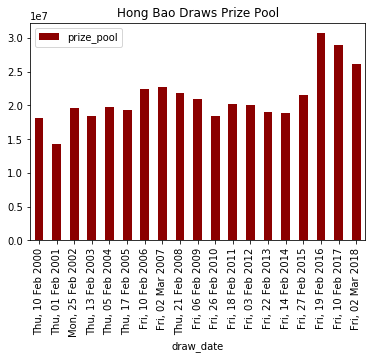

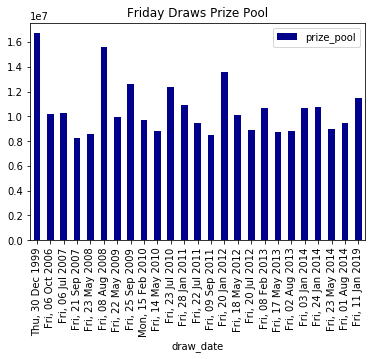

In [8]:
hong_baos_plot = hong_baos.plot.bar(x='draw_date', y='prize_pool', color='darkred')
hong_baos_plot.set_title('Hong Bao Draws Prize Pool')

fridays_plot = fridays.plot.bar(x='draw_date', y='prize_pool', color='darkblue')
fridays_plot.set_title('Friday Draws Prize Pool')

Text(0.5, 1.0, 'Prize Pool of Usual Draws Without Snowball')

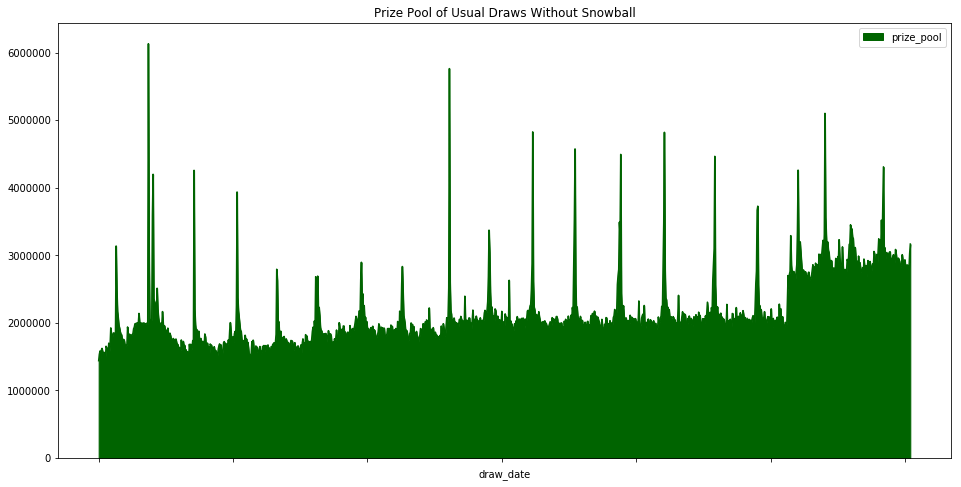

In [9]:
wo_snowball = draws[draws['usual'] & (draws['consecutive'] == 0)]
wo_snowball_plot = wo_snowball.plot.area(x='draw_date', y='prize_pool', color='darkgreen', figsize=(16, 8))
wo_snowball_plot.set_title('Prize Pool of Usual Draws Without Snowball')

Text(0.5, 1.0, 'Relationship between Jackpot Snowballed Amount & Prize Pool')

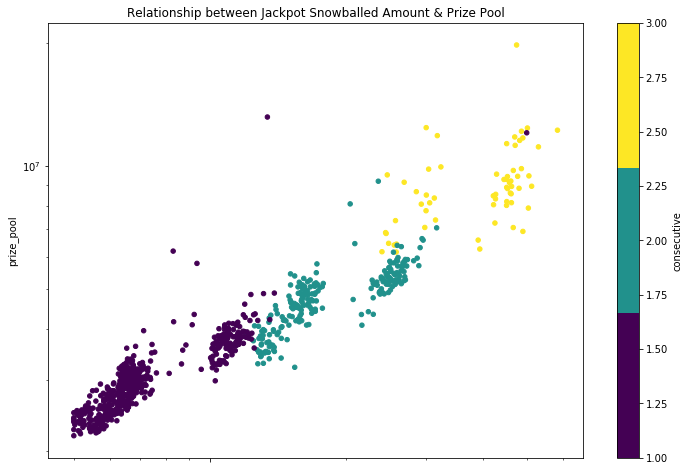

In [10]:
w_snowball = draws[draws['usual'] & (draws['consecutive'] > 0)]

from pylab import cm
w_snowball_plot = w_snowball.plot.scatter(x='snowballed_1', y='prize_pool', c='consecutive',
                                          logx=True, logy=True, colormap=cm.get_cmap('viridis', 3), figsize=(12, 8))
w_snowball_plot.set_title('Relationship between Jackpot Snowballed Amount & Prize Pool')